## NECESSARY IMPORTS

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mticker
import warnings

warnings.filterwarnings("ignore")


## DATA COLLECTION

In [75]:
train = pd.read_csv('Data/Train.csv')

train.head()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
0,7ee9e11e342e27c70455960acc80d3f91c1286d1,DAKAR,K > 24 month,20000.0,47.0,21602.0,7201.0,52.0,8835.0,3391.0,396.0,185.0,NaN,NaN,NO,62,On net 200F=Unlimited _call24H,30.0,0
1,50443f42bdc92b10388fc56e520e4421a5fa655c,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,3,NaN,NaN,0
2,da90b5c1a9b204c186079f89969aa01cb03c91b2,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,1,NaN,NaN,0
3,364ec1b424cdc64c25441a444a16930289a0051e,SAINT-LOUIS,K > 24 month,7900.0,19.0,7896.0,2632.0,25.0,9385.0,27.0,46.0,20.0,NaN,2.0,NO,61,"Data:490F=1GB,7d",7.0,0
4,d5a5247005bc6d41d3d99f4ef312ebb5f640f2cb,DAKAR,K > 24 month,12350.0,21.0,12351.0,4117.0,29.0,9360.0,66.0,102.0,34.0,NaN,NaN,NO,56,All-net 500F=2000F;5d,11.0,0


In [76]:
test = pd.read_csv('Data/Test.csv')

test.head()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK
0,51fe4c3347db1f8571d18ac03f716c41acee30a4,MATAM,I 18-21 month,2500.0,5.0,2500.0,833.0,5.0,0.0,64.0,70.0,NaN,NaN,NaN,NO,35,All-net 500F=2000F;5d,5.0
1,5ad5d67c175bce107cc97b98c4e37dcc38aa7f3e,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,2,NaN,NaN
2,5a4db591c953a8d8f373877fad37aaf4268899a1,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NO,22,NaN,NaN
3,8bf9b4d8880aeba1c9a0da48be78f12e629be37c,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,6,NaN,NaN
4,c7cdf2af01e9fa95bf498b68c122aa4b9a8d10df,SAINT-LOUIS,K > 24 month,5100.0,7.0,5637.0,1879.0,15.0,7783.0,30.0,24.0,0.0,0.0,NaN,NO,60,"Data:1000F=2GB,30d",4.0


In [77]:
train.shape, test.shape

((1077024, 19), (190063, 18))

In [78]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1077024 entries, 0 to 1077023
Data columns (total 19 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   user_id         1077024 non-null  object 
 1   REGION          652687 non-null   object 
 2   TENURE          1077024 non-null  object 
 3   MONTANT         699139 non-null   float64
 4   FREQUENCE_RECH  699139 non-null   float64
 5   REVENUE         714669 non-null   float64
 6   ARPU_SEGMENT    714669 non-null   float64
 7   FREQUENCE       714669 non-null   float64
 8   DATA_VOLUME     547261 non-null   float64
 9   ON_NET          683850 non-null   float64
 10  ORANGE          629880 non-null   float64
 11  TIGO            432250 non-null   float64
 12  ZONE1           84898 non-null    float64
 13  ZONE2           68794 non-null    float64
 14  MRG             1077024 non-null  object 
 15  REGULARITY      1077024 non-null  int64  
 16  TOP_PACK        626129 non-null   ob

In [79]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190063 entries, 0 to 190062
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         190063 non-null  object 
 1   REGION          115330 non-null  object 
 2   TENURE          190063 non-null  object 
 3   MONTANT         123695 non-null  float64
 4   FREQUENCE_RECH  123695 non-null  float64
 5   REVENUE         126422 non-null  float64
 6   ARPU_SEGMENT    126422 non-null  float64
 7   FREQUENCE       126422 non-null  float64
 8   DATA_VOLUME     96716 non-null   float64
 9   ON_NET          120771 non-null  float64
 10  ORANGE          111417 non-null  float64
 11  TIGO            76555 non-null   float64
 12  ZONE1           14850 non-null   float64
 13  ZONE2           12011 non-null   float64
 14  MRG             190063 non-null  object 
 15  REGULARITY      190063 non-null  int64  
 16  TOP_PACK        110773 non-null  object 
 17  FREQ_TOP_P

## DATA CLEANING

In [80]:
train.isnull().sum()

user_id                 0
REGION             424337
TENURE                  0
MONTANT            377885
FREQUENCE_RECH     377885
REVENUE            362355
ARPU_SEGMENT       362355
FREQUENCE          362355
DATA_VOLUME        529763
ON_NET             393174
ORANGE             447144
TIGO               644774
ZONE1              992126
ZONE2             1008230
MRG                     0
REGULARITY              0
TOP_PACK           450895
FREQ_TOP_PACK      450895
CHURN                   0
dtype: int64

In [81]:
test.isnull().sum()

user_id                0
REGION             74733
TENURE                 0
MONTANT            66368
FREQUENCE_RECH     66368
REVENUE            63641
ARPU_SEGMENT       63641
FREQUENCE          63641
DATA_VOLUME        93347
ON_NET             69292
ORANGE             78646
TIGO              113508
ZONE1             175213
ZONE2             178052
MRG                    0
REGULARITY             0
TOP_PACK           79290
FREQ_TOP_PACK      79290
dtype: int64

In [82]:
def clean_data(df):
    """ Data Cleaning Fuction"""
    # 1. Handle Missing Values
    # Dropping columns with a significant percentage of missing values (e.g., ZONE1, ZONE2)
    df = df.drop(columns=['ZONE1', 'ZONE2'], errors='ignore')

    # Filling missing values for numeric columns using median
    for col in ['MONTANT', 'FREQUENCE_RECH', 'REVENUE', 'ARPU_SEGMENT', 'FREQUENCE', 'DATA_VOLUME', 'ON_NET', 'ORANGE', 'TIGO', 'FREQ_TOP_PACK']:
        if col in df.columns:
            df[col] = df[col].fillna(df[col].median())

    # For categorical columns, filling missing values with a placeholder
    df['REGION'] = df['REGION'].fillna('Unknown') if 'REGION' in df.columns else df['REGION']
    df['TOP_PACK'] = df['TOP_PACK'].fillna('None') if 'TOP_PACK' in df.columns else df['TOP_PACK']


    # 2. Correct Data Types
    # Ensure CHURN is integer and user_id is treated as object if they exist
    if 'CHURN' in df.columns:
        df['CHURN'] = df['CHURN'].astype(int)

    df['user_id'] = df['user_id'].astype(str)

    # Converting MRG and TENURE to categorical if they exist
    df['MRG'] = df['MRG'].astype('category') if 'MRG' in df.columns else df['MRG']
    df['TENURE'] = df['TENURE'].astype('category') if 'TENURE' in df.columns else df['TENURE']


    # 3. Droping duplicates based on 'user_id' if they exist
    if 'user_id' in df.columns:
        df = df.drop_duplicates(subset=['user_id'])

    return df


# Cleaning both train and test dataframes
train_cleaned = clean_data(train)
test_cleaned = clean_data(test)

# Optionally save the cleaned datasets to new CSV files
train_cleaned.to_csv('cleaned_train_data.csv', index=False)
test_cleaned.to_csv('cleaned_test_data.csv', index=False)

In [83]:
train_cleaned.isnull().sum()

user_id           0
REGION            0
TENURE            0
MONTANT           0
FREQUENCE_RECH    0
REVENUE           0
ARPU_SEGMENT      0
FREQUENCE         0
DATA_VOLUME       0
ON_NET            0
ORANGE            0
TIGO              0
MRG               0
REGULARITY        0
TOP_PACK          0
FREQ_TOP_PACK     0
CHURN             0
dtype: int64

In [84]:
test_cleaned.isnull().sum()

user_id           0
REGION            0
TENURE            0
MONTANT           0
FREQUENCE_RECH    0
REVENUE           0
ARPU_SEGMENT      0
FREQUENCE         0
DATA_VOLUME       0
ON_NET            0
ORANGE            0
TIGO              0
MRG               0
REGULARITY        0
TOP_PACK          0
FREQ_TOP_PACK     0
dtype: int64

## EXPRORITORY DATA ANALYSIS

### 1. Churn Distribution

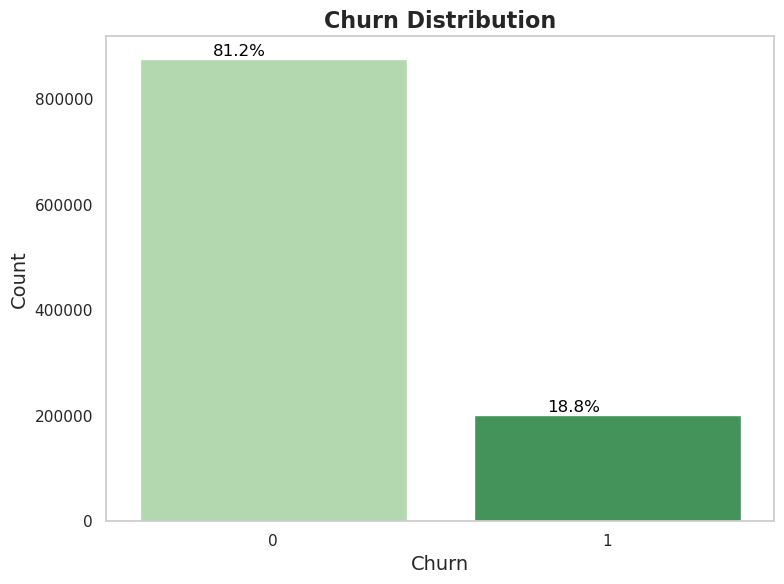

In [85]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='CHURN', data=train, palette='Greens')
plt.title('Churn Distribution', fontsize=16, weight='bold')
plt.xlabel('Churn', fontsize=14)
plt.ylabel('Count', fontsize=14)
ax.grid(False)
total = len(train)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2 - 0.1
    y = p.get_height()
    ax.annotate(percentage, (x, y), fontsize=12, color='black', ha='center', va='bottom')
plt.tight_layout()
plt.show()


### 2. Tenure Distribution

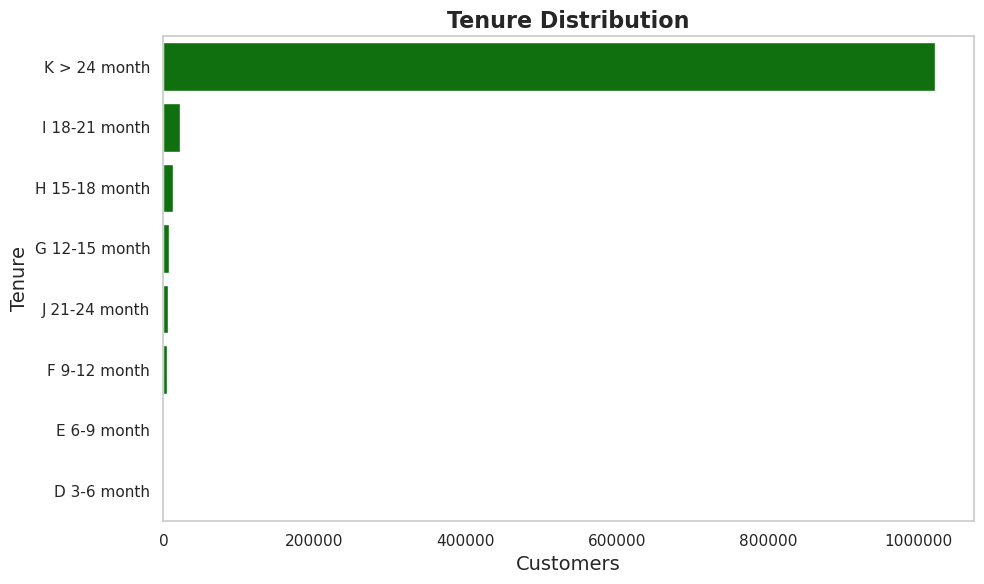

In [86]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(y='TENURE', data=train, order=train['TENURE'].value_counts().index, color='green')
plt.title('Tenure Distribution', fontsize=16, weight='bold')
plt.xlabel('Customers', fontsize=14)
plt.ylabel('Tenure', fontsize=14)
ax.grid(False)
ax.xaxis.set_major_formatter(mticker.ScalarFormatter())
ax.xaxis.get_major_formatter().set_scientific(False)
plt.tight_layout()
plt.show()


### 3. Revenue vs Churn

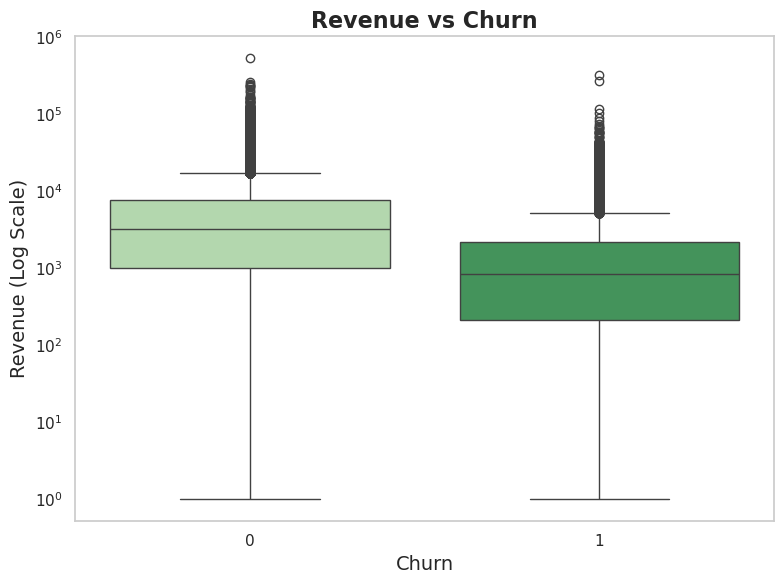

In [87]:
plt.figure(figsize=(8, 6))
ax = sns.boxplot(x='CHURN', y='REVENUE', data=train, palette='Greens')
ax.set_yscale('log')
plt.title('Revenue vs Churn', fontsize=16, weight='bold')
plt.xlabel('Churn', fontsize=14)
plt.ylabel('Revenue (Log Scale)', fontsize=14)
ax.grid(False)
plt.tight_layout()
plt.show()

### 4. Correlation Heatmap

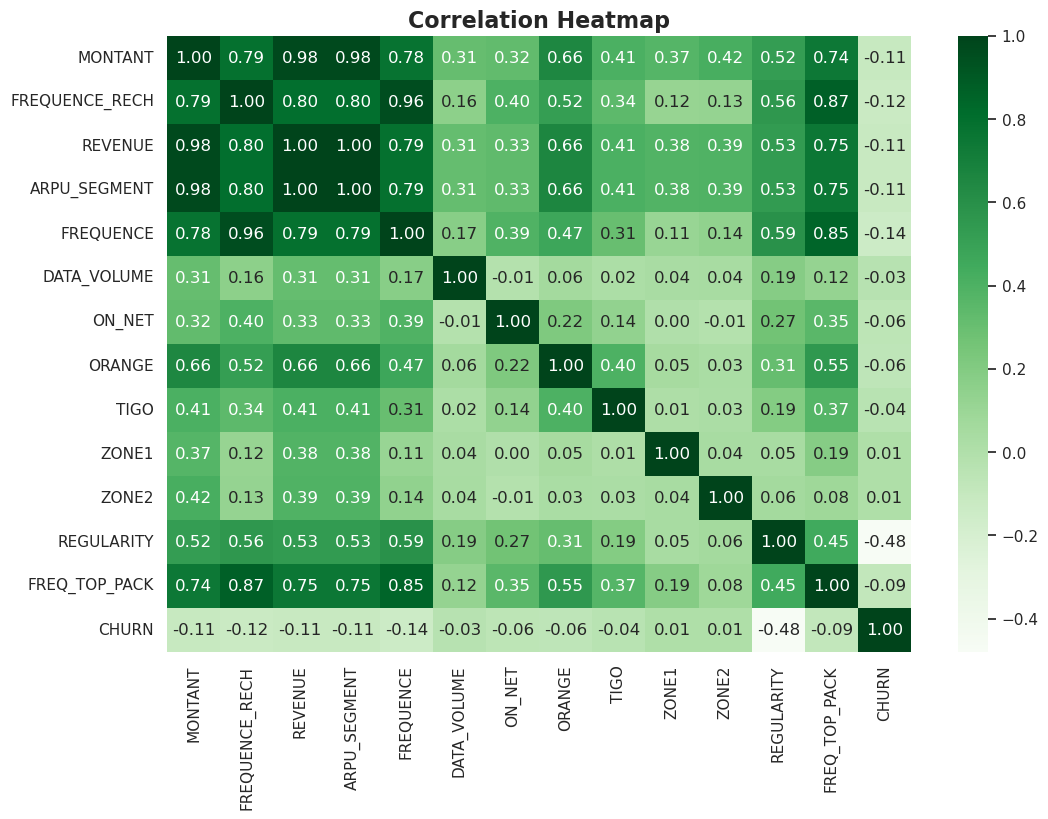

In [88]:

numeric_data = train.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='Greens', fmt='.2f')
plt.title('Correlation Heatmap', fontsize=16, weight='bold')
plt.show()


### 5. Top Pack Usage vs Churn

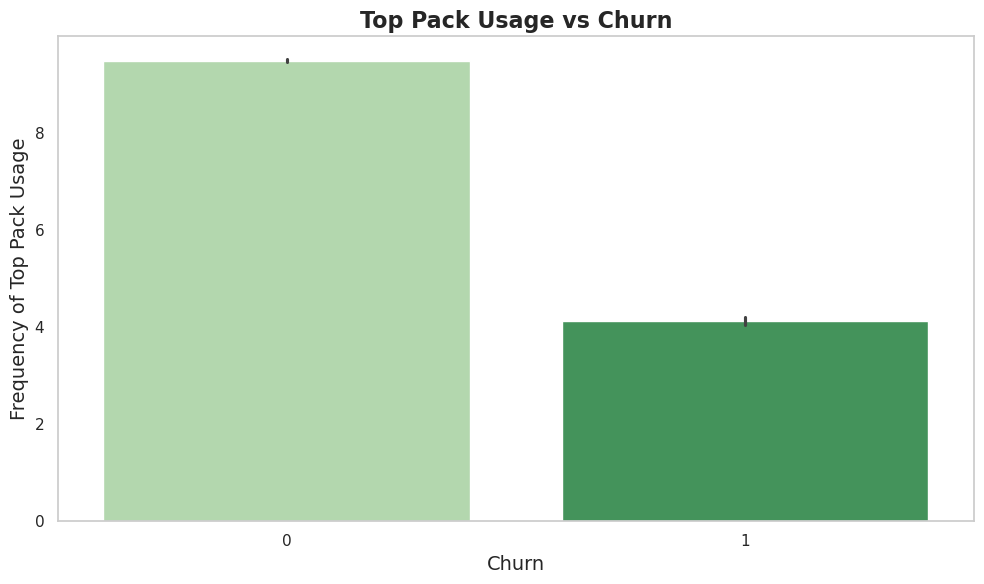

In [89]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='CHURN', y='FREQ_TOP_PACK', data=train, palette='Greens')
plt.title('Top Pack Usage vs Churn', fontsize=16, weight='bold')
plt.xlabel('Churn', fontsize=14)
plt.ylabel('Frequency of Top Pack Usage', fontsize=14)
ax.grid(False)
plt.tight_layout()
plt.show()

### 6. Region Distribution

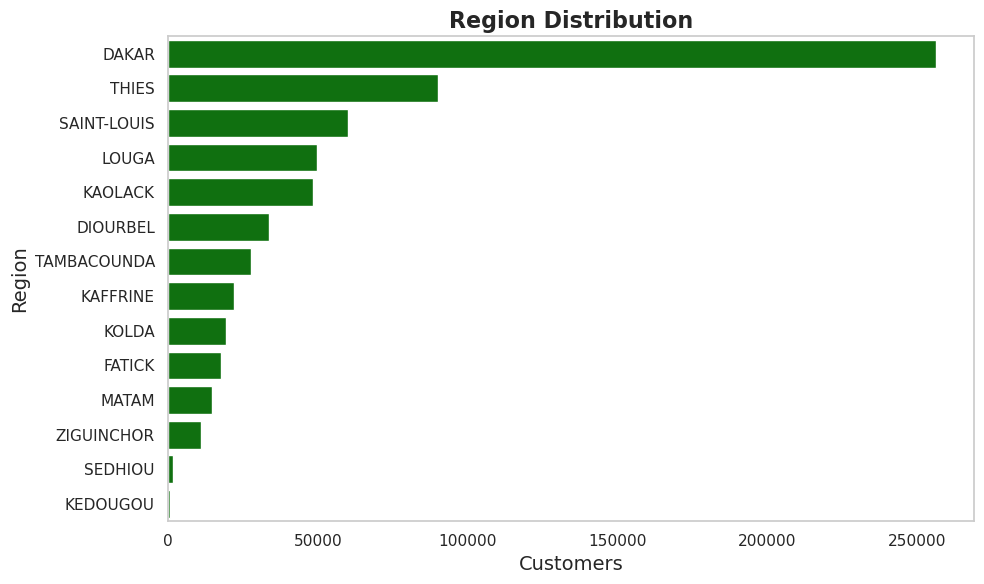

In [90]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(y='REGION', data=train, order=train['REGION'].value_counts().index, color='green')
plt.title('Region Distribution', fontsize=16, weight='bold')
plt.xlabel('Customers', fontsize=14)
plt.ylabel('Region', fontsize=14)
ax.grid(False)
plt.tight_layout()
plt.show()

### 7. Revenue and Frequency Distribution

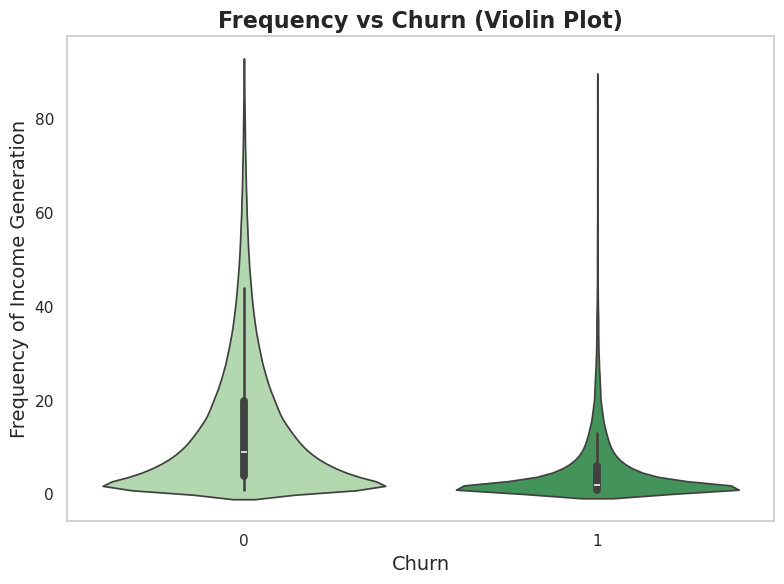

In [91]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='CHURN', y='FREQUENCE', data=train, palette='Greens')
plt.title('Frequency vs Churn (Violin Plot)', fontsize=16, weight='bold')
plt.xlabel('Churn', fontsize=14)
plt.ylabel('Frequency of Income Generation', fontsize=14)
plt.grid(False)
plt.tight_layout()
plt.show()


### 8. Regularity vs Churn

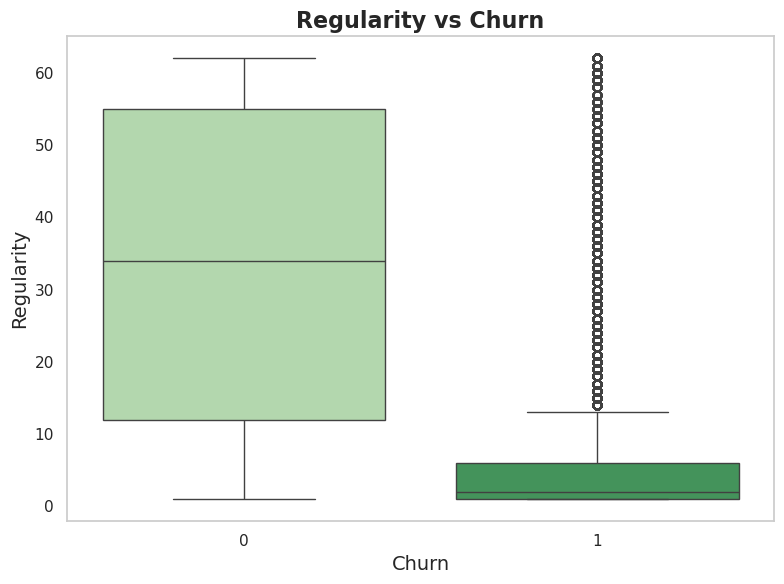

In [92]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='CHURN', y='REGULARITY', data=train, palette='Greens')
plt.title('Regularity vs Churn', fontsize=16, weight='bold')
plt.xlabel('Churn', fontsize=14)
plt.ylabel('Regularity', fontsize=14)
plt.grid(False)
plt.tight_layout()
plt.show()


In [93]:
top_pack_table = train['TOP_PACK'].value_counts(normalize=False).head(20).reset_index()
top_pack_table.columns = ['TOP_PACK', 'Counts']
top_pack_table['Proportion'] = train['TOP_PACK'].value_counts(normalize=True).head(20).values
top_pack_table

,TOP_PACK,Counts,Proportion
0,All-net 500F=2000F;5d,158779,0.253588
1,On net 200F=Unlimited _call24H,76302,0.121863
2,"Data:490F=1GB,7d",57679,0.092120
3,"Data: 100 F=40MB,24H",42515,0.067901
4,Mixt 250F=Unlimited_call24H,33620,0.053695
5,MIXT:500F= 2500F on net _2500F off net;2d,32164,0.051370
6,"Data:1000F=2GB,30d",29982,0.047885
7,All-net 500F =2000F_AllNet_Unlimited,23476,0.037494
8,Jokko_Daily,22548,0.036012
9,"Data: 200 F=100MB,24H",21515,0.034362


In [94]:
summary_statistics = train.select_dtypes(include=['int64', 'float64']).describe().T
summary_statistics

,count,mean,std,min,25%,50%,75%,max
MONTANT,699139.0,5529.210895,7104.737952,20.0,1000.0,3000.0,7350.0,470000.0
FREQUENCE_RECH,699139.0,11.523756,13.261938,1.0,2.0,7.0,16.0,131.0
REVENUE,714669.0,5506.050798,7175.625010,1.0,1000.0,3000.0,7360.0,532177.0
ARPU_SEGMENT,714669.0,1835.355961,2391.870902,0.0,333.0,1000.0,2453.0,177392.0
FREQUENCE,714669.0,13.974439,14.687059,1.0,3.0,9.0,20.0,91.0
DATA_VOLUME,547261.0,3368.801722,12898.928039,0.0,0.0,258.0,2905.0,1702309.0
ON_NET,683850.0,277.065798,874.315378,0.0,5.0,27.0,156.0,50809.0
ORANGE,629880.0,95.160804,203.020261,0.0,7.0,29.0,99.0,12040.0
TIGO,432250.0,23.105018,64.035464,0.0,2.0,6.0,20.0,4174.0
ZONE1,84898.0,8.167483,39.245883,0.0,0.0,1.0,3.0,2507.0


## HYPOTHESIS TESTING

## ANSWERING ANALIYTICAL QUESTIONS

##  DATA PREPROCESSING